In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [43]:
df = pd.read_csv("../data/adult.csv")
df = df.replace("?", pd.NA).dropna()

incorrect_less_50K = df[(df["salary"] == "<=50K") & (df["salary K$"] > 50)]
incorrect_more_50K = df[(df["salary"] == ">50K") & (df["salary K$"] <= 50)]

incorrect_data = pd.concat([incorrect_less_50K, incorrect_more_50K])

if incorrect_data.empty:
    print("Data is correct")
else:
    print(f"Uncorrected data:{incorrect_data}")


Data is correct


# Task 1
Print the count of men and women in the dataset.

In [44]:
print(df["sex"].value_counts())

sex
Male      20380
Female     9782
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [45]:
average_age_men = df[df["sex"] == "Male"]["age"].mean()
print(average_age_men)

39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [46]:
country_counts = df["native-country"].value_counts()
count_from_poland = country_counts.get("Poland", 0)
total_count = len(df)
percentage_from_poland = (count_from_poland / total_count) * 100
print(percentage_from_poland)

0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [47]:
high_earners = df[df["salary"] == ">50K"]
mean_high = high_earners["age"].mean()
std_high = high_earners["age"].std()
print(f"For high earners - Mean: {mean_high}, Standard Deviation: {std_high}")

low_earners = df[df["salary"] == "<=50K"]
mean_low = low_earners["age"].mean()
std_low = low_earners["age"].std()
print(f"For low earners - Mean: {mean_low}, Standard Deviation: {std_low}")

For high earners - Mean: 43.95911028236548, Standard Deviation: 10.269632835673852
For low earners - Mean: 36.60806038668668, Standard Deviation: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [48]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
no_higher_education = df[~df["education"].isin(higher_education)]

high_salary_no_higher_education = no_higher_education[no_higher_education["salary"] == ">50K"]

if high_salary_no_higher_education.empty:
    print("No people without higher education with salary >50K.")
else:
    print(f"People without higher education with salary >50K. {high_salary_no_higher_education}")

People without higher education with salary >50K.        Unnamed: 0  age         workclass     education      marital-status  \
7               7   52  Self-emp-not-inc       HS-grad  Married-civ-spouse   
10             10   37           Private  Some-college  Married-civ-spouse   
55             55   43           Private  Some-college  Married-civ-spouse   
67             67   53           Private       HS-grad  Married-civ-spouse   
68             68   49      Self-emp-inc  Some-college  Married-civ-spouse   
...           ...  ...               ...           ...                 ...   
32462       32462   48      Self-emp-inc       HS-grad  Married-civ-spouse   
32518       32518   57         Local-gov       HS-grad  Married-civ-spouse   
32519       32519   46           Private  Some-college  Married-civ-spouse   
32557       32557   40           Private       HS-grad  Married-civ-spouse   
32560       32560   52      Self-emp-inc       HS-grad  Married-civ-spouse   

             

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [36]:
education_age_stats = df.groupby("education")["age"].describe()
print(education_age_stats)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [49]:
men = df[df["sex"] == "Male"]

married_men = men[men["marital-status"].str.startswith("Married")]
non_married_men = men[~men["marital-status"].str.startswith("Married")]

married_high_earners = married_men[married_men["salary"] == ">50K"].shape[0]
married_low_earners = married_men[married_men["salary"] == "<=50K"].shape[0]

non_married_high_earners = non_married_men[non_married_men["salary"] == ">50K"].shape[0]
non_married_low_earners = non_married_men[non_married_men["salary"] == "<=50K"].shape[0]

print(f"Number of married men with salary >50K: {married_high_earners}")
print(f"Number of married men with salary <=50K: {married_low_earners}\n")

print(f"Number of non-married men with salary >50K: {non_married_high_earners}")
print(f"Number of non-married men with salary <=50K: {non_married_low_earners}")

# Compare
if married_high_earners > non_married_high_earners:
    print("Married men earn more than non-married men.")
elif married_high_earners < non_married_high_earners:
    print("Non-married men earn more than married men.")
else:
    print("The number of married and non-married men earning >50K is the same.")

Number of married men with salary >50K: 5723
Number of married men with salary <=50K: 7052

Number of non-married men with salary >50K: 673
Number of non-married men with salary <=50K: 6932
Married men earn more than non-married men.


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [50]:
max_hours = df["hours-per-week"].max()
num_people_max_hours = df[df["hours-per-week"] == max_hours].shape[0]

print(f"Number of people working {max_hours} hours per week: {num_people_max_hours}")

Number of people working 99 hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

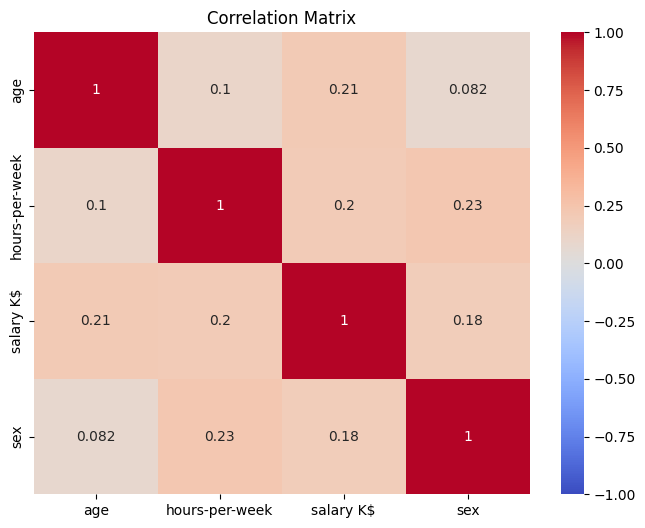

In [51]:
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df_filtered = df[["age", "hours-per-week", "salary K$", "sex"]].copy()
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()
